<a href="https://colab.research.google.com/github/GraceOluwafemi/Msc-Project/blob/main/projectupdated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize
import pickle

#Libaries
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler





# Libraries for Data Preprocessing
import glob
from numpy import sort
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.gridspec as gridspec
from xgboost import plot_importance, to_graphviz
from sklearn.model_selection import StratifiedKFold


# Importing ML Model packages
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegressionCV
import sklearn.neighbors
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import VotingClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler

# Libraries for measuring accuracy
from sklearn.metrics import classification_report,roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
#from sklearn.metrics import plot_roc_curve
from sklearn.metrics import confusion_matrix, matthews_corrcoef, roc_curve, make_scorer
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerBase
from matplotlib.text import Text



In [2]:
# Load the data from a CSV file
data = pd.read_csv("https://raw.githubusercontent.com/GraceOluwafemi/Msc-Project/main/diabetes_data.csv")

# Print the first few rows of the data
print (data.head())

   Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0              0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1              0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2              0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3              0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4              0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           0.0     0.0  ...            1.0   
1                   0.0           1.0     0.0  ...            0.0   
2                   0.0           0.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      5.0      18.0      15.0       1.0  0.0   9.0   

In [3]:
data.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [4]:
data = data.rename(columns={'Diabetes_binary': 'Diabetes_Status'})

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_Status       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [ ]:
data['Diabetes_Status'] = data['Diabetes_Status'].astype(int)
print (data.head())

   Diabetes_Status  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0                0     1.0       1.0        1.0  40.0     1.0     0.0   
1                0     0.0       0.0        0.0  25.0     1.0     0.0   
2                0     1.0       1.0        1.0  28.0     0.0     0.0   
3                0     1.0       0.0        1.0  27.0     0.0     0.0   
4                0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           0.0     0.0  ...            1.0   
1                   0.0           1.0     0.0  ...            0.0   
2                   0.0           0.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      5.0      18.0      15.0       1.0  0.0   9.0   

In [6]:
data.describe()

,Diabetes_Status,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.139333,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.346294,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [ ]:
data.isna().sum()

Diabetes_Status         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [7]:
data['Diabetes_Status'].value_counts()

0.0    218334
1.0     35346
Name: Diabetes_Status, dtype: int64

**Exploratory Data Analysis**

 Univariate Analysis

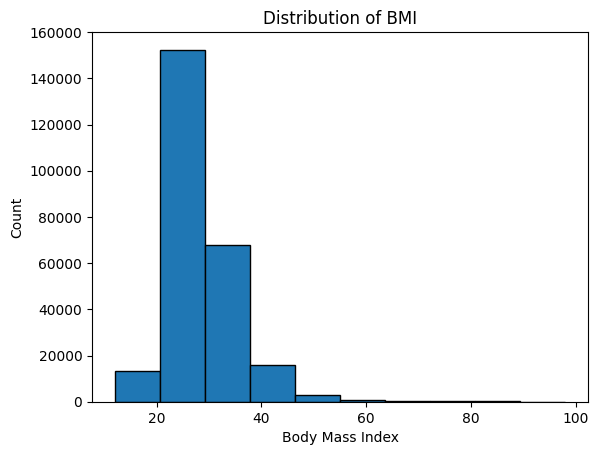

In [ ]:
# Generate the histogram
plt.hist(data['BMI'], bins=10, edgecolor='black')

# Set plot labels and title
plt.xlabel('Body Mass Index')
plt.ylabel('Count')
plt.title('Distribution of BMI')

# Show the histogram
plt.show()

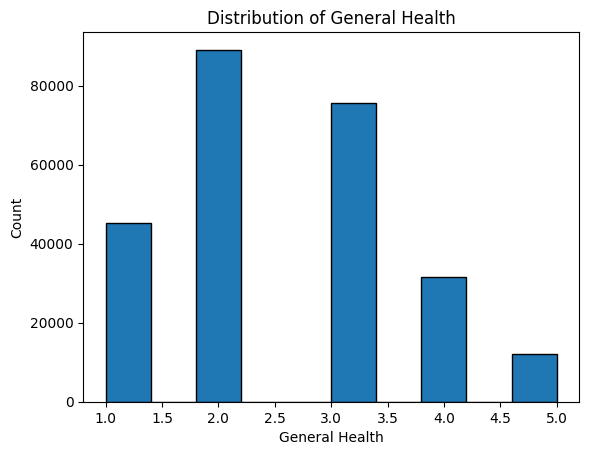

In [ ]:
# Generate the histogram
plt.hist(data['GenHlth'], bins=10, edgecolor='black')

# Set plot labels and title
plt.xlabel('General Health')
plt.ylabel('Count')
plt.title('Distribution of General Health')

# Show the histogram
plt.show()

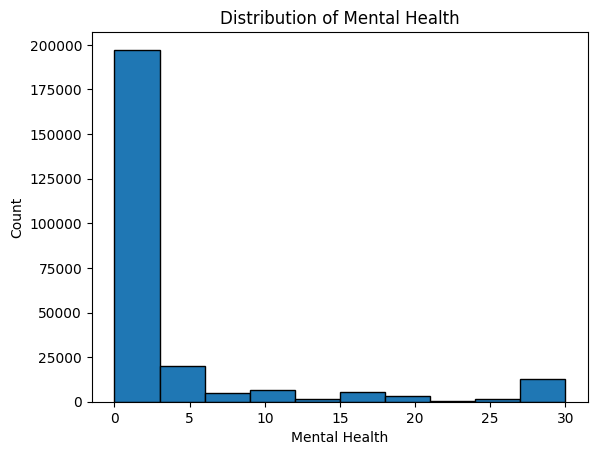

In [ ]:
# Generate the histogram
plt.hist(data['MentHlth'], bins=10, edgecolor='black')

# Set plot labels and title
plt.xlabel('Mental Health')
plt.ylabel('Count')
plt.title('Distribution of Mental Health')

# Show the histogram
plt.show()

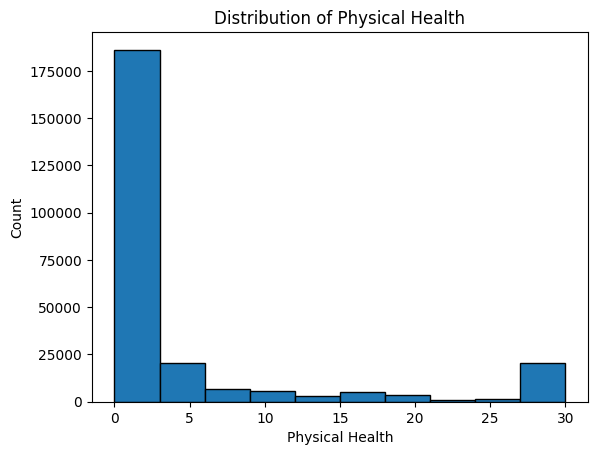

In [ ]:
# Generate the histogram
plt.hist(data['PhysHlth'], bins=10, edgecolor='black')

# Set plot labels and title
plt.xlabel('Physical Health')
plt.ylabel('Count')
plt.title('Distribution of Physical Health')

# Show the histogram
plt.show()

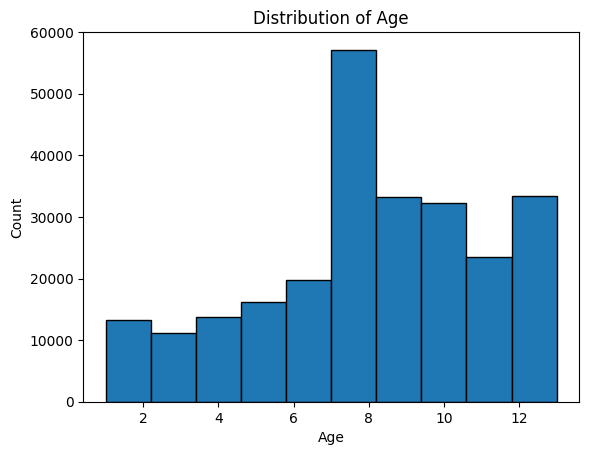

In [ ]:
# Generate the histogram
plt.hist(data['Age'], bins=10, edgecolor='black')

# Set plot labels and title
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age')

# Show the histogram
plt.show()

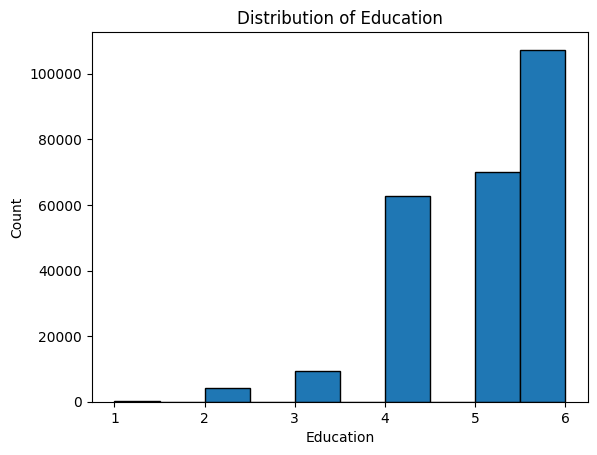

In [ ]:
# Generate the histogram
plt.hist(data['Education'], bins=10, edgecolor='black')

# Set plot labels and title
plt.xlabel('Education')
plt.ylabel('Count')
plt.title('Distribution of Education')

# Show the histogram
plt.show()

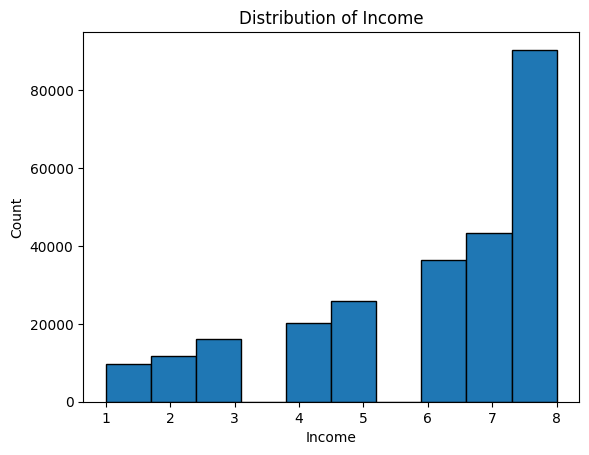

In [ ]:
# Generate the histogram
plt.hist(data['Income'], bins=10, edgecolor='black')

# Set plot labels and title
plt.xlabel('Income')
plt.ylabel('Count')
plt.title('Distribution of Income')

# Show the histogram
plt.show()

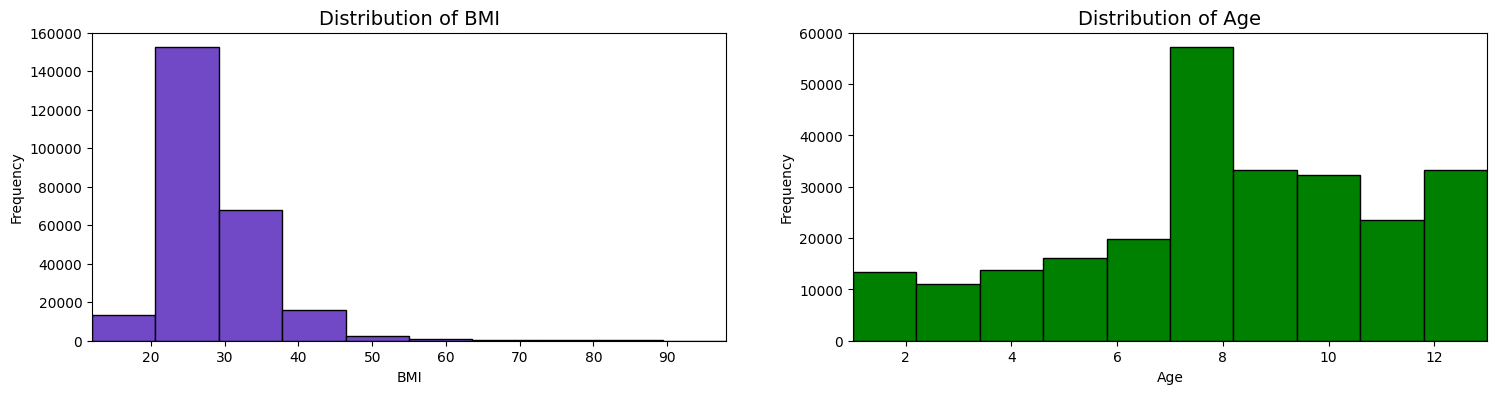

In [ ]:


# Create a figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(18, 4))

# Extract the 'BMI' and 'Age' columns
BMI = data['BMI'].values
Age = data['Age'].values

# Plot the histogram for 'BMI'
ax[0].hist(BMI, bins=10, edgecolor='black', color='#7149C6')
ax[0].set_title('Distribution of BMI', fontsize=14)
ax[0].set_xlabel('BMI')
ax[0].set_ylabel('Frequency')
ax[0].set_xlim([min(BMI), max(BMI)])  # Set x-axis limits for BMI

# Plot the histogram for 'Age'
ax[1].hist(Age, bins=10, edgecolor='black', color='green')
ax[1].set_title('Distribution of Age', fontsize=14)
ax[1].set_xlabel('Age')
ax[1].set_ylabel('Frequency')
ax[1].set_xlim([min(Age), max(Age)])  # Set x-axis limits for Age

# Remove gridlines
for axes in ax:
    axes.grid(False)

# Adjust spacing
#plt.tight_layout()

# Display the plot
plt.show()


 Bivariate Analysis

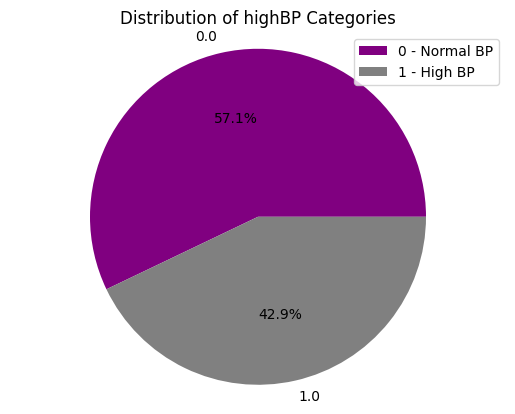

In [ ]:
# Count the occurrences of each category
category_counts = data['HighBP'].value_counts()

# Create a pie chart
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', colors=['purple', 'grey'])

# Add legend
legend_labels = ['0 - Normal BP', '1 - High BP']
plt.legend(legend_labels, loc='best')

# Set title and aspect ratio
plt.title('Distribution of highBP Categories')
plt.axis('equal')

# Display the chart
plt.show()


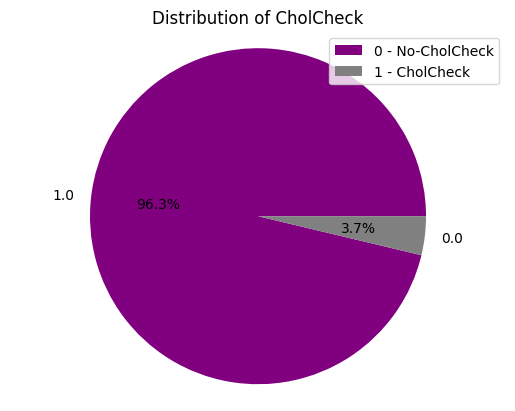

In [ ]:
# Count the occurrences of each category
category_counts = data['CholCheck'].value_counts()

# Create a pie chart
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', colors=['purple', 'grey'])

# Add legend
legend_labels = ['0 - No-CholCheck', '1 - CholCheck']
plt.legend(legend_labels, loc='best')

# Set title and aspect ratio
plt.title('Distribution of CholCheck')
plt.axis('equal')

# Display the chart
plt.show()

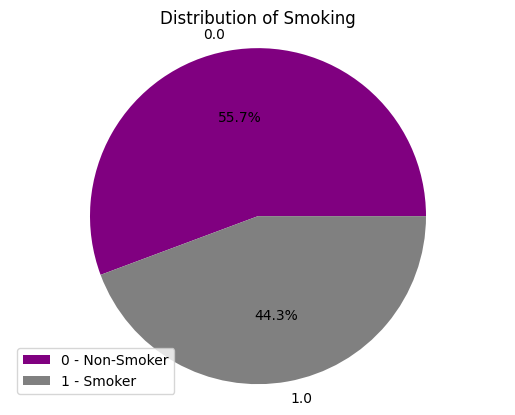

In [ ]:
# Count the occurrences of each category
category_counts = data['Smoker'].value_counts()

# Create a pie chart
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', colors=['purple', 'grey'])

# Add legend
legend_labels = ['0 - Non-Smoker', '1 - Smoker']
plt.legend(legend_labels, loc='best')

# Set title and aspect ratio
plt.title('Distribution of Smoking')
plt.axis('equal')

# Display the chart
plt.show()

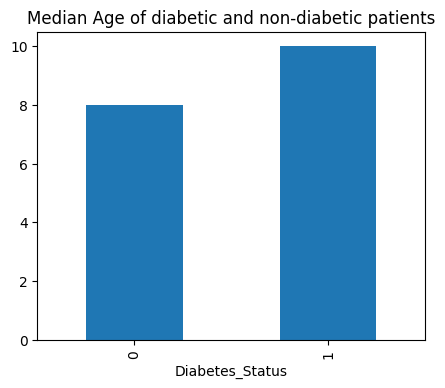

In [ ]:
plt.figure(figsize=(5,4))
data.groupby('Diabetes_Status')['Age'].median().plot(kind='bar')
plt.title('Median Age of diabetic and non-diabetic patients')
plt.show()

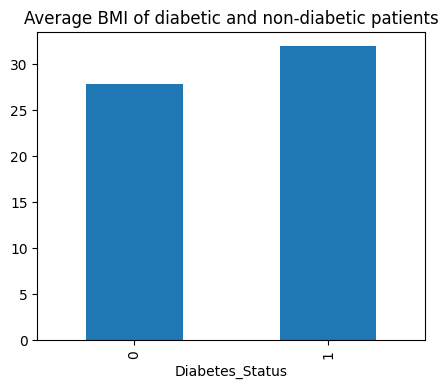

In [ ]:
plt.figure(figsize=(5,4))
data.groupby('Diabetes_Status')['BMI'].mean().plot(kind='bar')
plt.title('Average BMI of diabetic and non-diabetic patients')
plt.show()

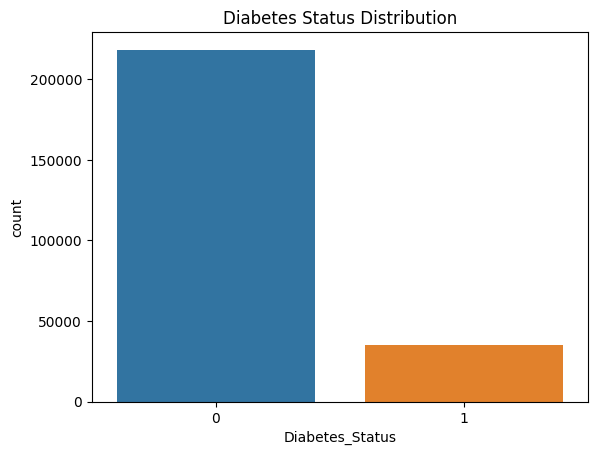

In [ ]:
# Class distribution
sns.countplot(x='Diabetes_Status', data=data)
plt.title('Diabetes Status Distribution')
plt.show()

Multivariant Analysis

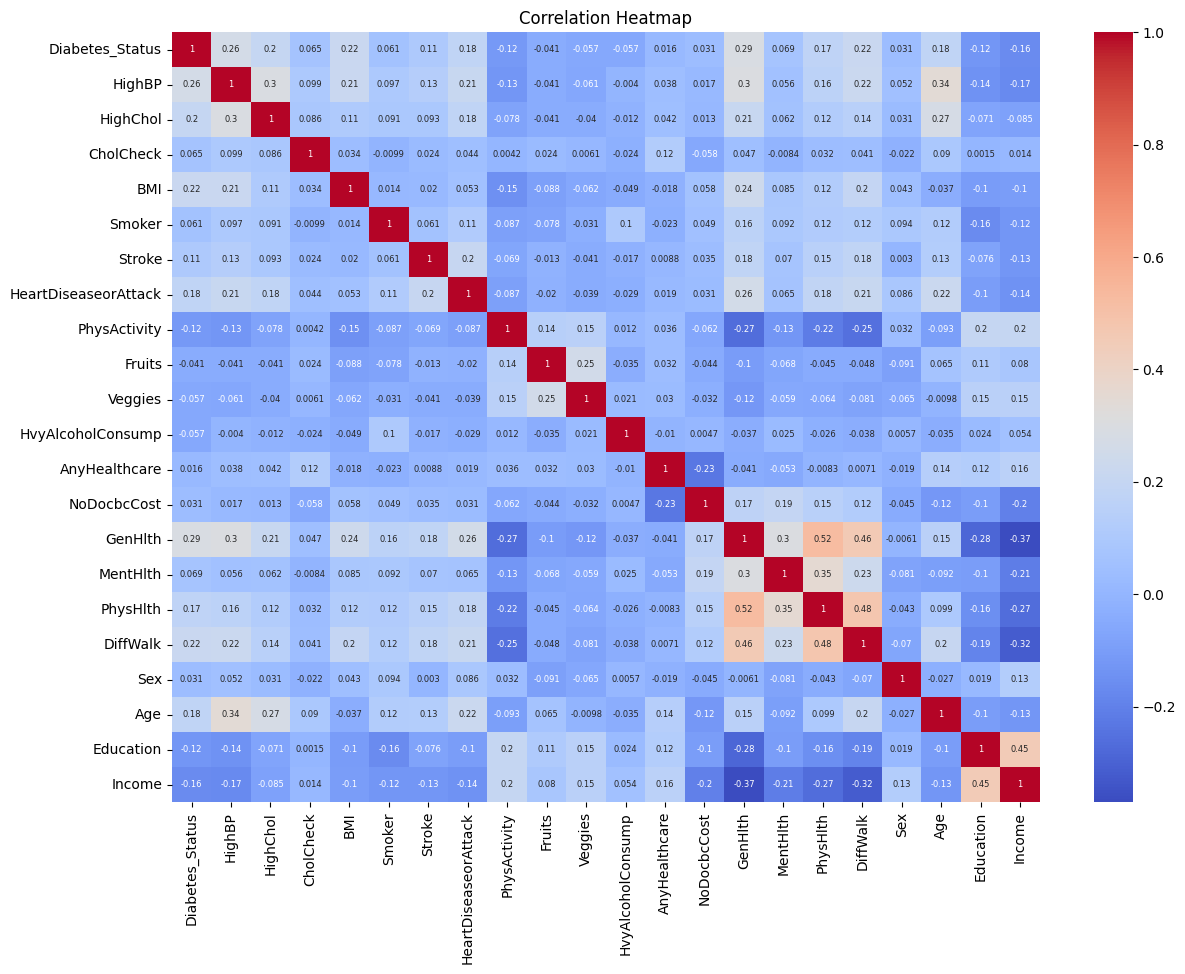

In [ ]:
# Calculate the correlation matrix for the 22 output features
corr_matrix = data.corr()

# Set the figure size for the heatmap
plt.figure(figsize=(14, 10))

# Set a larger font size for the annotations
annot_font_size = 6

# Draw the heatmap with annotations
sns.heatmap(corr_matrix, annot=True, annot_kws={"size": annot_font_size}, cmap="coolwarm")

# Add a title to the plot
plt.title("Correlation Heatmap")

# Show the plot
plt.show()

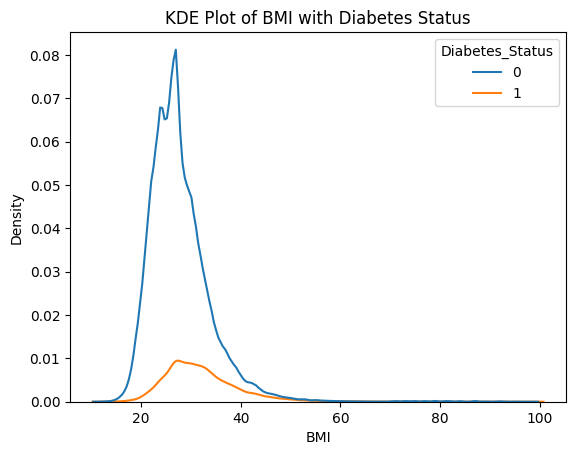

In [ ]:
# Create the KDE plot
sns.kdeplot(data=data, x='BMI', hue='Diabetes_Status')

# Add labels and a title
plt.xlabel('BMI')
plt.title('KDE Plot of BMI with Diabetes Status')

# Show the plot
plt.show()

**Handling Outliers**

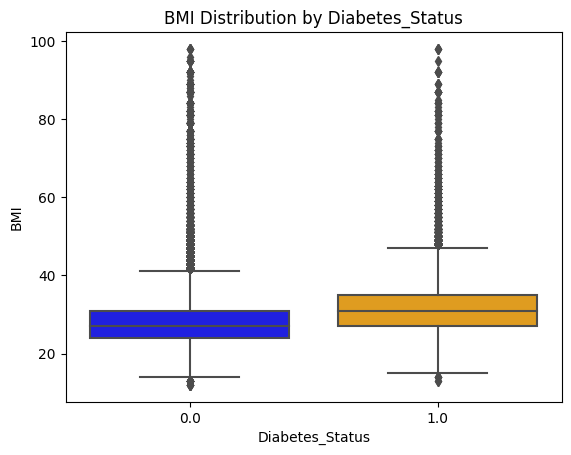

In [8]:
# Create a boxplot
sns.boxplot(x='Diabetes_Status', y='BMI', data=data, palette=['blue', 'orange'])
plt.title('BMI Distribution by Diabetes_Status')
plt.xlabel('Diabetes_Status')
plt.ylabel('BMI')

# Display the plot
plt.show()


In [9]:

# Replace values in the 'BMI' column with mean value of 28.4 where 'Diabetes_Status' is equal to 0 and 'BMI' is greater than 39
data.loc[(data["Diabetes_Status"] == 0) & (data["BMI"] > 39), 'BMI'] = 28.4

# Replace values in the 'BMI' column with mean value of 28.4 where 'Diabetes_Status' is equal to 0 and 'BMI' is less than 10
data.loc[(data["Diabetes_Status"] == 0) & (data["BMI"] < 15), 'BMI'] = 28.4

# Replace values in the 'BMI' column with mean value of 28.4 where 'Diabetes_Status' is equal to 0 and 'BMI' is greater than 43
data.loc[(data["Diabetes_Status"] == 1) & (data["BMI"] > 43), 'BMI'] = 28.4

# Replace values in the 'BMI' column with mean value of 28.4 where 'Diabetes_Status' is equal to 0 and 'BMI' is less than 17
data.loc[(data["Diabetes_Status"] == 1) & (data["BMI"] < 17), 'BMI'] = 28.4


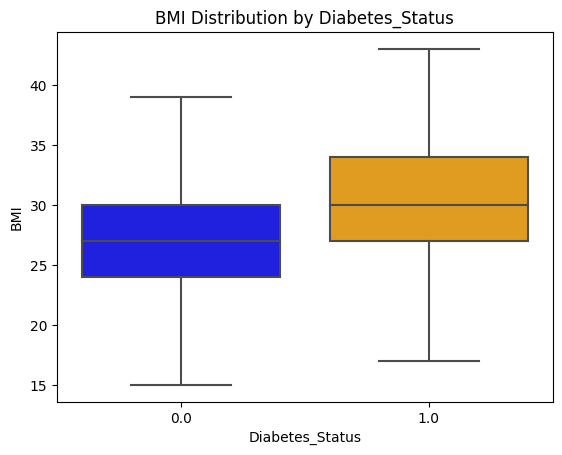

In [10]:
# Create a boxplot
sns.boxplot(x='Diabetes_Status', y='BMI', data=data, palette=['blue', 'orange'])
plt.title('BMI Distribution by Diabetes_Status')
plt.xlabel('Diabetes_Status')
plt.ylabel('BMI')

# Display the plot
plt.show()


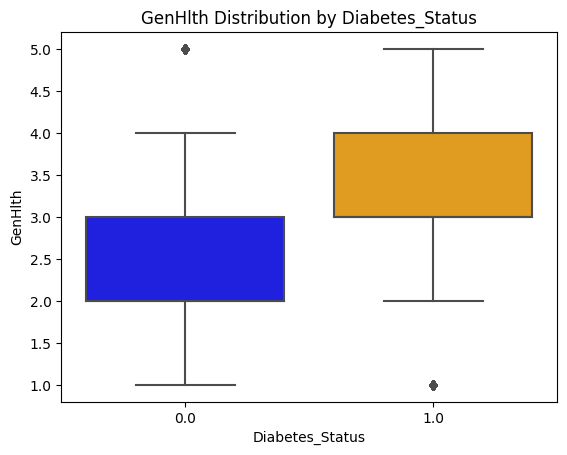

In [11]:
# Create a boxplot
sns.boxplot(x='Diabetes_Status', y='GenHlth', data=data, palette=['blue', 'orange'])
plt.title('GenHlth Distribution by Diabetes_Status')
plt.xlabel('Diabetes_Status')
plt.ylabel('GenHlth')

# Display the plot
plt.show()

In [12]:
# Replace values in the 'GenHlth' column with mean value of 2.5 where 'Diabetes_Status' is equal to 0 and 'GenHlth' is greater than 4
data.loc[(data["Diabetes_Status"] == 0) & (data["GenHlth"] > 4), 'GenHlth'] = 2.5

# Replace values in the 'GenHlth' column with mean value of 2.5 where 'Diabetes_Status' is equal to 0 and 'GenHlth' is less than 1.5
data.loc[(data["Diabetes_Status"] == 1) & (data["GenHlth"] < 1.5), 'GenHlth'] = 2.5

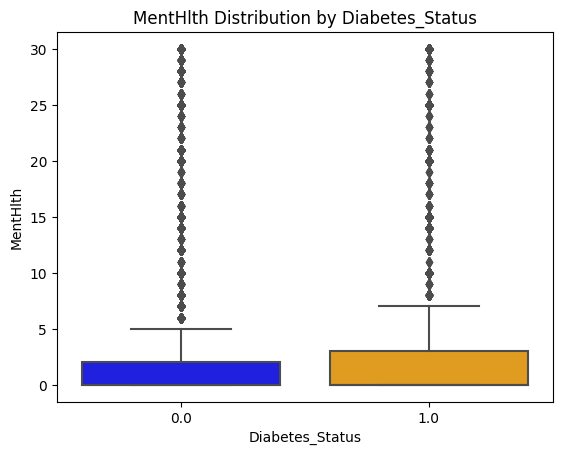

In [13]:
# Create a boxplot
sns.boxplot(x='Diabetes_Status', y='MentHlth', data=data, palette=['blue', 'orange'])
plt.title('MentHlth Distribution by Diabetes_Status')
plt.xlabel('Diabetes_Status')
plt.ylabel('MentHlth')

# Display the plot
plt.show()

In [14]:
# Replace values in the 'MentHlth' column with mean value of 3.2 where 'Diabetes_Status' is equal to 0 and 'MentHlth' is greater than 4
data.loc[(data["Diabetes_Status"] == 0) & (data["MentHlth"] > 5), 'MentHlth'] = 3.2

# Replace values in the 'MentHlth' column with mean value of 3.2 where 'Diabetes_Status' is equal to 1 and 'MentHlth' is greater than 6
data.loc[(data["Diabetes_Status"] == 1) & (data["MentHlth"] > 6), 'MentHlth'] = 3.2

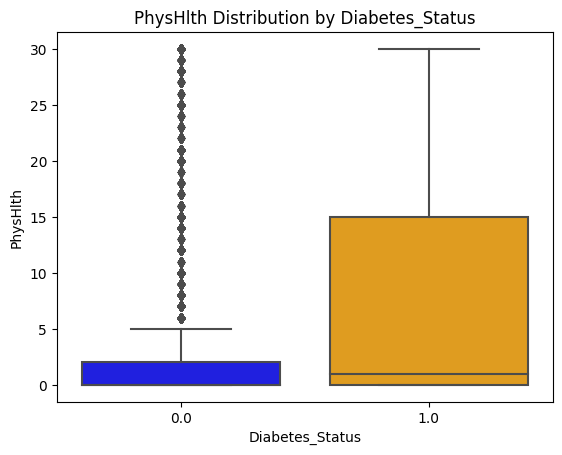

In [15]:
# Create a boxplot
sns.boxplot(x='Diabetes_Status', y='PhysHlth', data=data, palette=['blue', 'orange'])
plt.title('PhysHlth Distribution by Diabetes_Status')
plt.xlabel('Diabetes_Status')
plt.ylabel('PhysHlth')

# Display the plot
plt.show()

In [16]:
# Replace values in the 'PhysHlth' column with mean value of 4.4 where 'Diabetes_Status' is equal to 0 and 'PhysHlth' is greater than 5
data.loc[(data["Diabetes_Status"] == 0) & (data["PhysHlth"] > 5), 'PhysHlth'] = 4.4



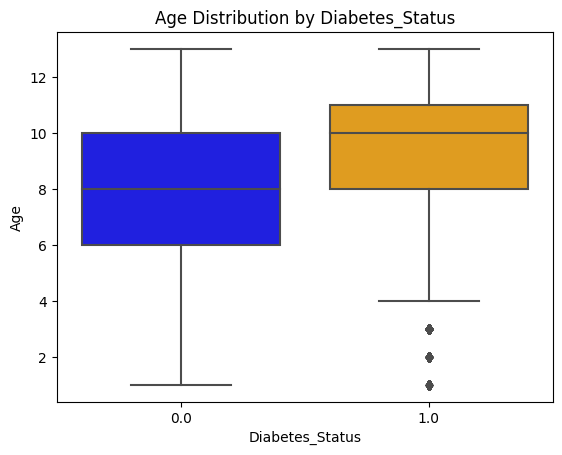

In [17]:
# Create a boxplot
sns.boxplot(x='Diabetes_Status', y='Age', data=data, palette=['blue', 'orange'])
plt.title('Age Distribution by Diabetes_Status')
plt.xlabel('Diabetes_Status')
plt.ylabel('Age')

# Display the plot
plt.show()

In [18]:
# Replace values in the 'Age' column with mean value of 8 where 'Diabetes_Status' is equal to 1 and 'Age' is less than 4
data.loc[(data["Diabetes_Status"] == 1) & (data["Age"] < 4), 'Age'] = 8

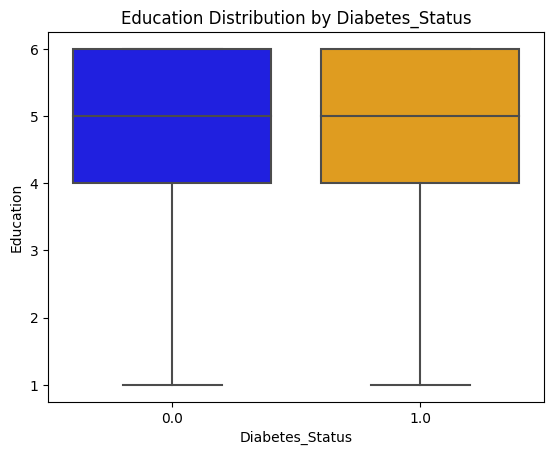

In [19]:
# Create a boxplot
sns.boxplot(x='Diabetes_Status', y='Education', data=data, palette=['blue', 'orange'])
plt.title('Education Distribution by Diabetes_Status')
plt.xlabel('Diabetes_Status')
plt.ylabel('Education')

# Display the plot
plt.show()

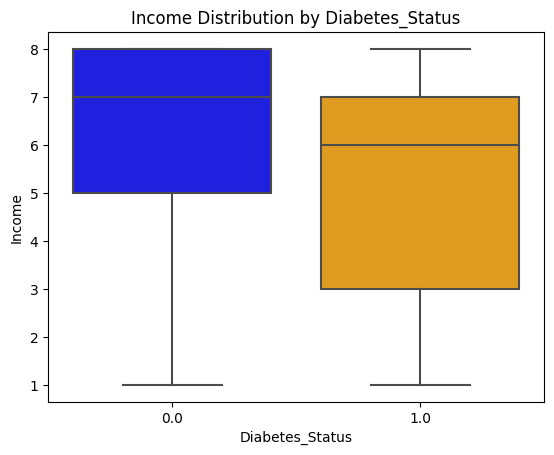

In [21]:
# Create a boxplot
sns.boxplot(x='Diabetes_Status', y='Income', data=data, palette=['blue', 'orange'])
plt.title('Income Distribution by Diabetes_Status')
plt.xlabel('Diabetes_Status')
plt.ylabel('Income')

# Display the plot
plt.show()

In [ ]:
#del new_data

In [23]:
# Create a copy of the original dataset
new_data = data.copy()

Feature Selection

In [24]:
y = new_data.Diabetes_Status
x = new_data.drop(["Diabetes_Status"],axis = 1)
columns = x.columns.tolist()

In [25]:
# Apply SMOTE for oversampling
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(x, y)

# Display the class distribution after oversampling
print("\nClass distribution after oversampling:")
print(pd.Series(y_resampled).value_counts())


Class distribution after oversampling:
0.0    218334
1.0    218334
Name: Diabetes_Status, dtype: int64


In [26]:
# Normalize the features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X_resampled)

In [27]:


# Assuming you have your data loaded in X and y
# And the feature names are given as a list
feature_names = ['HighChol', 'CholCheck', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Veggies',
                 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex', 'HighBP',
                 'BMI', 'Smoker', 'Fruits', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income']

# Normalize the features
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X_resampled)

# Define the evaluation criteria and corresponding weights
# Let's assume we have three evaluation criteria: accuracy, precision, and recall.
# You can replace these with any other relevant evaluation measures.
weights = [0.7, 0.6]

# Define the classifier
classifier = LogisticRegression()

# Calculate the evaluation scores (accuracy, precision, recall) using cross-validation
def evaluate_features(X, y_resampled, classifier):
    scores = []
    scoring = ['roc_auc', 'recall']

    for feature in range(X.shape[1]):
        X_feature = X[:, feature].reshape(-1, 1)
        score = [np.mean(cross_val_score(classifier, X_feature, y_resampled, cv=5, scoring=scoring[i])) for i in range(len(scoring))]
        scores.append(score)

    return np.array(scores)

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_normalized, y_resampled, test_size=0.3, random_state=42)

# Calculate the evaluation scores for each feature on the training set
evaluation_scores_train = evaluate_features(X_train, Y_train, classifier)

# Calculate the weighted sum for each feature
weighted_sums_train = np.dot(evaluation_scores_train, weights)

# Sort the features based on the weighted sum
ranked_features_indices = np.argsort(weighted_sums_train)[::-1]
ranked_features = [feature_names[idx] for idx in ranked_features_indices]
ranks = np.arange(1, len(ranked_features) + 1)

# Create a DataFrame to store the ranked features and their corresponding scores
ranked_features_df = pd.DataFrame({'Feature': ranked_features, 'Score': weighted_sums_train, 'Rank': ranks})
#ranked_features_df = pd.DataFrame({'Feature': ranked_features, 'Rank': ranks})

# Sort the DataFrame based on the Rank column in descending order
ranked_features_df = ranked_features_df.sort_values(by='Rank', ascending=True)

# Display the ranked features with their corresponding scores and ranks
print("Ranked features:")
print(ranked_features_df.to_string(index=False))

# Create a new DataFrame with the output
output_df = ranked_features_df.copy()

Ranked features:
             Feature    Score  Rank
              Smoker 0.949173     1
              Stroke 0.870513     2
            HighChol 0.956672     3
                 Sex 0.826787     4
              HighBP 0.699212     5
           CholCheck 0.448293     6
                 Age 0.577038     7
HeartDiseaseorAttack 0.654434     8
              Income 0.632033     9
        PhysActivity 0.549059    10
           Education 0.943419    11
            MentHlth 0.920179    12
             GenHlth 0.445659    13
            PhysHlth 1.010102    14
       AnyHealthcare 0.560845    15
         NoDocbcCost 0.692968    16
   HvyAlcoholConsump 0.693007    17
              Fruits 0.658917    18
            DiffWalk 0.862414    19
             Veggies 0.698188    20
                 BMI 0.748667    21


In [ ]:
#del new_data1

In [28]:
# Create a new DataFrame with the output
new_data1 = new_data.copy()

In [29]:
# Drop columns from the DataFrame

columns_to_drop = ['Income','PhysActivity','Education','MentHlth','GenHlth','PhysHlth','AnyHealthcare','NoDocbcCost','HvyAlcoholConsump','Fruits','DiffWalk','Veggies','BMI']
new_data1 = new_data1.drop(columns=columns_to_drop, axis=1)

In [30]:
# 'data' now contains the DataFrame with the specified columns dropped
print(new_data1)

        Diabetes_Status  HighBP  HighChol  CholCheck  Smoker  Stroke  \
0                   0.0     1.0       1.0        1.0     1.0     0.0   
1                   0.0     0.0       0.0        0.0     1.0     0.0   
2                   0.0     1.0       1.0        1.0     0.0     0.0   
3                   0.0     1.0       0.0        1.0     0.0     0.0   
4                   0.0     1.0       1.0        1.0     0.0     0.0   
...                 ...     ...       ...        ...     ...     ...   
253675              0.0     1.0       1.0        1.0     0.0     0.0   
253676              1.0     1.0       1.0        1.0     0.0     0.0   
253677              0.0     0.0       0.0        1.0     0.0     0.0   
253678              0.0     1.0       0.0        1.0     0.0     0.0   
253679              1.0     1.0       1.0        1.0     0.0     0.0   

        HeartDiseaseorAttack  Sex   Age  
0                        0.0  0.0   9.0  
1                        0.0  0.0   7.0  
2        

In [31]:
y_over = new_data1.Diabetes_Status
X_over = new_data1.drop(["Diabetes_Status"],axis = 1)
columns = X_over.columns.tolist()

In [32]:
# Apply SMOTE for oversampling
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_over, y_over = smote.fit_resample(X_over, y_over)

# Display the class distribution after oversampling
print("\nClass distribution after oversampling:")
print(pd.Series(y_over).value_counts())


Class distribution after oversampling:
0.0    218334
1.0    218334
Name: Diabetes_Status, dtype: int64


In [33]:
X_train_over1, X_test_over1, Y_train_over1, Y_test_over1 = train_test_split(X_over ,y_over , test_size = 0.3, random_state = 42)

In [34]:
# Scale the selected features in both training and test sets
scaler = StandardScaler()
X_train_over1 = scaler.fit_transform(X_train_over1)
X_test_over1 = scaler.transform(X_test_over1)


In [39]:
# Instantiate individual models

lr = LogisticRegression(random_state=42)
xgb = xgb.XGBClassifier(random_state=42)

In [40]:
# Instantiate a VotingClassifier with individual models
vc = VotingClassifier(estimators=[('lr', lr), ('xgb', xgb)], voting='hard')

In [41]:
# Define the hyperparameter grid for the individual models
xgb_params = {'max_depth': [3, 6, 9],'learning_rate': [0.01, 0.1, 0.2],'n_estimators': [100, 200, 300],
    'subsample': [0.8, 1.0],'colsample_bytree': [0.8, 1.0],}
lr_params = {'penalty': ['l1', 'l2', 'elasticnet'], 'C': [0.01, 0.1, 1, 10, 100], 'solver': ['liblinear']}

In [42]:
# Define the hyperparameter grid for the VotingClassifier
vc_params = {'voting': ['hard', 'soft'], 'weights': [[1, 1], [2, 1], [1, 2]]}

In [ ]:
# Perform grid search to find the best hyperparameters for the individual models and the VotingClassifier
xgb_gs = GridSearchCV(xgb, xgb_params, cv=5, n_jobs=-1)
dt_gs.fit(X_train_over1, Y_train_over1)

lr_gs = GridSearchCV(lr, lr_params, cv=5, n_jobs=-1)
lr_gs.fit(X_train_over1, Y_train_over1)

vc_gs = GridSearchCV(vc, vc_params, cv=5, n_jobs=-1)
vc_gs.fit(X_train_over1, Y_train_over1)



In [ ]:
# Print the best hyperparameters for the individual models and the VotingClassifier
print("Logistic Regression: ", xgb_gs.best_params_)
print("Logistic Regression: ", lr_gs.best_params_)
print("Voting Classifier: ", vc_gs.best_params_)


Algorithm Modelling

In [ ]:
from sklearn.model_selection import GridSearchCV
# Logistic Regression
logreg_classifier = LogisticRegression(solver='lbfgs')  # Specify the solver
param_grid_logreg = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2', 'l1']  # Use penalties compatible with lbfgs solver
}
grid_search_logreg = GridSearchCV(estimator=logreg_classifier, param_grid=param_grid_logreg, cv=3, scoring='f1')
grid_search_logreg.fit(X_train_over1, Y_train_over1)
best_params_logreg = grid_search_logreg.best_params_
best_estimator_logreg = grid_search_logreg.best_estimator_

# GNB
gnb_classifier = GaussianNB()
param_grid_gnb = {
    'var_smoothing': [1e-9, 1e-8, 1e-7]
}
grid_search_gnb = GridSearchCV(estimator=gnb_classifier, param_grid=param_grid_gnb, cv=3, scoring='f1')
grid_search_gnb.fit(X_train_over1, Y_train_over1)
best_params_gnb = grid_search_gnb.best_params_
best_estimator_gnb = grid_search_gnb.best_estimator_

# XGBoost
xgb_classifier = xgb.XGBClassifier()
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001]
}
grid_search_xgb = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid_xgb, cv=3, scoring='f1')
grid_search_xgb.fit(X_train_over1, Y_train_over1)
best_params_xgb = grid_search_xgb.best_params_
best_estimator_xgb = grid_search_xgb.best_estimator_

# Predict using the best estimators
y_pred_best_logreg = best_estimator_logreg.predict(X_test_over1)
y_pred_best_gnb = best_estimator_gnb.predict(X_test_over1)
y_pred_best_xgb = best_estimator_xgb.predict(X_test_over1)

# Evaluate the models
accuracy_logreg = accuracy_score(Y_test_over1, y_pred_best_logreg)
accuracy_gnb = accuracy_score(Y_test_over1, y_pred_best_gnb)
accuracy_xgb = accuracy_score(Y_test_over1, y_pred_best_xgb)

print("Logistic Regression Best Parameters:", best_params_logreg)
print("Logistic Regression Best Model Accuracy:", accuracy_logreg)
print("GNB Best Parameters:", best_params_gnb)
print("GNB Best Model Accuracy:", accuracy_gnb)
print("XGBoost Best Parameters:", best_params_xgb)
print("XGBoost Best Model Accuracy:", accuracy_xgb)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
12 fits failed out of a total of 24.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solve

KeyboardInterrupt: ignored

In [ ]:
# Create Logistics Regression classifier
lg = LogisticRegression(solver='liblinear')

# Train the classifier
lg.fit(X_train_over1, Y_train_over1)

# Make predictions on the testing set
y_pred_lgover = lg.predict(X_test_over1)

y_pred_lgover1 = lg.predict_proba(X_test_over1)[:, 1]
fpr_lgover, tpr_lgover, thresholds_lgover = roc_curve(Y_test_over1, y_pred_lgover1)
auc_lgover = roc_auc_score(Y_test_over1, y_pred_lgover1)

# Evaluate the model
#print('Accuracy:', accuracy_score(Y_test_over, y_pred_lg))
#print('Confusion Matrix:', confusion_matrix(Y_test_over, y_pred_lg))

# Evaluate the model
print('Accuracy:', accuracy_score(Y_test_over1, y_pred_lgover))
print('Precision:', precision_score(Y_test_over1, y_pred_lgover))
print('Recall:', recall_score(Y_test_over1, y_pred_lgover))
print('AUC:', auc_lgover)
print('Confusion Matrix:')
print(confusion_matrix(Y_test_over1, y_pred_lgover))

# Classification report
class_report = classification_report(Y_test_over1, y_pred_lgover)
print('Classification Report:\n', class_report)

Accuracy: 0.7031549377485669
Precision: 0.6930974224552207
Recall: 0.7276744079379883
AUC: 0.7632189776160523
Confusion Matrix:
[[44519 21075]
 [17812 47595]]
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.68      0.70     65594
           1       0.69      0.73      0.71     65407

    accuracy                           0.70    131001
   macro avg       0.70      0.70      0.70    131001
weighted avg       0.70      0.70      0.70    131001



In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix

# Create Naive Bayes classifier
nb = GaussianNB()

# Train the classifier
nb.fit(X_train_over1, Y_train_over1)

# Make predictions on the testing set
y_pred_nbover = nb.predict(X_test_over1)

y_pred_nbover1 = nb.predict_proba(X_test_over1)[:, 1]
fpr_nbover, tpr_nbover, thresholds_nbover = roc_curve(Y_test_over1, y_pred_nbover1)
auc_nbover = roc_auc_score(Y_test_over1, y_pred_nbover1)

# Evaluate the model
#print('Accuracy:', accuracy_score(Y_test_over, y_pred_nb))
#print('Confusion Matrix:', confusion_matrix(Y_test_over, y_pred_nb))

# Evaluate the model
print('Accuracy:', accuracy_score(Y_test_over1, y_pred_nbover))
print('Precision:', precision_score(Y_test_over1, y_pred_nbover))
print('Recall:', recall_score(Y_test_over1, y_pred_nbover))
print('f1:', f1_score(Y_test_over1, y_pred_nbover))
print('AUC:', auc_nbover)
print('Confusion Matrix:')
print(confusion_matrix(Y_test_over1, y_pred_nbover))


# Classification report
class_report = classification_report(Y_test_over1, y_pred_nbover)
print('Classification Report:\n', class_report)

Accuracy: 0.7017656353768292
Precision: 0.6702609055413338
Recall: 0.7926062959622059
f1: 0.7263174854468907
AUC: 0.7587614520639833
Confusion Matrix:
[[40090 25504]
 [13565 51842]]
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.61      0.67     65594
           1       0.67      0.79      0.73     65407

    accuracy                           0.70    131001
   macro avg       0.71      0.70      0.70    131001
weighted avg       0.71      0.70      0.70    131001



In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix

# Create XGBoost classifier
xgb_classifier = xgb.XGBClassifier()

# Train the classifier
xgb_classifier.fit(X_train_over1, Y_train_over1)

# Make predictions on the testing set
y_pred_xgb = xgb_classifier.predict(X_test_over1)

# Get predicted probabilities for positive class
y_pred_proba_xgb = xgb_classifier.predict_proba(X_test_over1)[:, 1]


# Evaluate the model
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(Y_test_over1, y_pred_proba_xgb)
accuracy = accuracy_score(Y_test_over1, y_pred_xgb)
confusion_mat = confusion_matrix(Y_test_over1, y_pred_xgb)
auc_xgb = roc_auc_score(Y_test_over1, y_pred_proba_xgb)


# Evaluate the model
print('Accuracy:', accuracy_score(Y_test_over1, y_pred_xgb))
print('Precision:', precision_score(Y_test_over1, y_pred_xgb))
print('Recall:', recall_score(Y_test_over1, y_pred_xgb))
print('f1:', f1_score(Y_test_over1, y_pred_xgb))
print('AUC:', auc_xgb)

print('Confusion Matrix:')
print(confusion_matrix(Y_test_over1, y_pred_xgb))


# Classification report
class_report = classification_report(Y_test_over1, y_pred_xgb)
print('Classification Report:\n', class_report)


Accuracy: 0.7123228066961321
Precision: 0.6884321002759765
Recall: 0.7742137691684376
f1: 0.7288074609251318
AUC: 0.7788660398860925
Confusion Matrix:
[[42676 22918]
 [14768 50639]]
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.65      0.69     65594
           1       0.69      0.77      0.73     65407

    accuracy                           0.71    131001
   macro avg       0.72      0.71      0.71    131001
weighted avg       0.72      0.71      0.71    131001



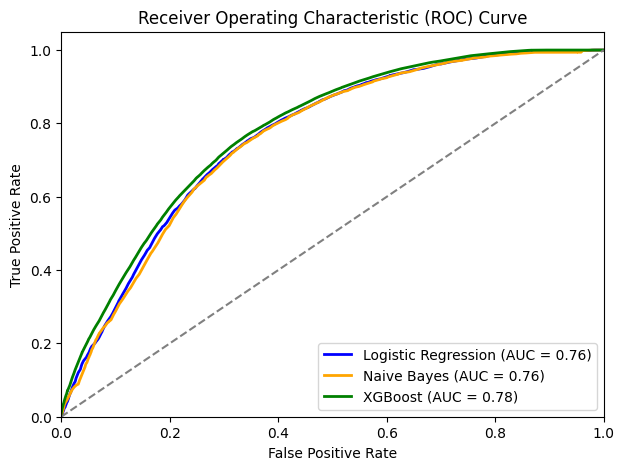

In [ ]:
# Plot ROC AUC curves for Logistic Regression, Naive Bayes, and XGBoost
plt.figure(figsize=(7, 5))

# Plot Logistic Regression ROC curve
plt.plot(fpr_lgover, tpr_lgover, color='blue', lw=2, label=f'Logistic Regression (AUC = {auc_lgover:.2f})')

# Plot Naive Bayes ROC curve
plt.plot(fpr_nbover, tpr_nbover, color='orange', lw=2, label=f'Naive Bayes (AUC = {auc_nbover:.2f})')

# Plot XGBoost ROC curve
plt.plot(fpr_xgb, tpr_xgb, color='green', lw=2, label=f'XGBoost (AUC = {auc_xgb:.2f})')

# Plot random line for reference
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Set plot properties
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

# Show the plot
plt.show()


In [ ]:
# Calculate confusion matrix
confusion_mat = confusion_matrix(Y_test_over1, y_pred_xgb)
tn, fp, fn, tp = confusion_mat.ravel()


# Calculate False Alarm Rate (FAR)
false_alarm_rate = fp / (fp + tn)

# Print metrics
print('False Alarm Rate:', false_alarm_rate)

False Alarm Rate: 0.3493917126566454


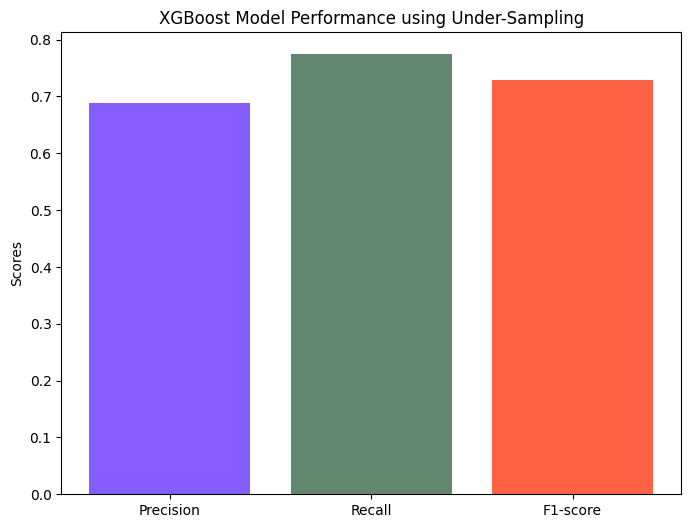

In [ ]:

colors = ['#865DFF', '#61876E', '#FE6244']  # Update colors here ['#865DFF', '#FFC6D3']

# Calculate confusion matrix
# Compute classification report
report = classification_report(Y_test_over1, y_pred_xgb, output_dict=True)
precision = report['1']['precision']
recall = report['1']['recall']
f1 = report['1']['f1-score']

# Create a bar chart
labels = ['Precision', 'Recall', 'F1-score']
scores = [precision, recall, f1]
x = np.arange(len(labels))

# Increase size of chart
plt.figure(figsize=(8, 6))

plt.bar(x, scores, color=colors)
plt.xticks(x, labels)
plt.ylabel('Scores')
plt.title('XGBoost Model Performance using Under-Sampling')
plt.show()


In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
# Build the ANN model
model = Sequential()

# Add input layer and hidden layers
model.add(Dense(units=64, activation='relu', input_dim=X_train_over1.shape[1]))
model.add(Dense(units=32, activation='relu'))


# Add output layer
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['Recall'])

# Train the model
model.fit(X_train_over1, Y_train_over1, epochs=10, batch_size=32, verbose=1)

# Evaluate the model on the test set
#y_pred = model.predict_classes(X_test_over1)
#confusion = confusion_matrix(Y_test_over1, y_pred)
#class_report = classification_report(Y_test_over1, y_pred)

# Predict probabilities
y_pred_proba = model.predict(X_test_over1)

# Apply threshold for class prediction (adjust threshold as needed)
threshold = 0.7
y_pred = (y_pred_proba > threshold).astype(int)

# Calculate confusion matrix and classification report
confusion = confusion_matrix(Y_test_over1, y_pred)
class_report = classification_report(Y_test_over1, y_pred)

print("Confusion Matrix:")
print(confusion)
print("\nClassification Report:")
print(class_report)


Epoch 1/10
9553/9553 [==============================] - 25s 2ms/step - loss: 0.5646 - recall: 0.7695
Epoch 2/10
9553/9553 [==============================] - 21s 2ms/step - loss: 0.5605 - recall: 0.7754
Epoch 3/10
9553/9553 [==============================] - 20s 2ms/step - loss: 0.5594 - recall: 0.7762
Epoch 4/10
9553/9553 [==============================] - 21s 2ms/step - loss: 0.5588 - recall: 0.7766
Epoch 5/10
9553/9553 [==============================] - 19s 2ms/step - loss: 0.5584 - recall: 0.7749
Epoch 6/10
9553/9553 [==============================] - 21s 2ms/step - loss: 0.5581 - recall: 0.7747
Epoch 7/10
9553/9553 [==============================] - 21s 2ms/step - loss: 0.5579 - recall: 0.7739
Epoch 8/10
9553/9553 [==============================] - 20s 2ms/step - loss: 0.5576 - recall: 0.7737
Epoch 9/10
9553/9553 [==============================] - 22s 2ms/step - loss: 0.5574 - recall: 0.7733
Epoch 10/10
4094/4094 [==============================] - 5s 1ms/step
Confusion Matrix:
[[54

In [ ]:
# Save the trained model to a file named 'model.pkl'
with open('xgb_classifier.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)